<h3>Formula used for the analysis</h3>

ug = − g/f*(∂S/∂y) 
vg = (g/f)*(∂S/∂x) 



here f = 2**omega**sin(latitude)

omega is angular speed of earth 

In [12]:
import xarray
import gsw
import numpy as np
import matplotlib.pyplot as plt
import math

<h3>we have 360 values of sea surface heights along
latitude and 720 along longitude so I have created array of the so that I can take the dx and dy in future</h3>


In [13]:
lat_list = np.linspace(-89.75, 89.75, 360) 
lon_list = np.linspace(-179.75, 179.75, 720)

g = 9.8 #value of g
r = 6370e3 #earth radius
omega = 7.2921*(10**-5) #agnular speed of earth


<h3>Converting change in degrees to dx and dy. Here dlat and dlon are dx and dy</h3>
<h3>The value of "f" depends on the latitude hence I have calculated the value of "f" along all latitudes</h3>

In [18]:
dlat = 2*np.pi*(0.5/360)*r
dlon = 2*np.pi*r*(0.5/360)*np.cos(np.deg2rad(lat_list)).reshape(360,1)* np.ones((360,720))
f=2*omega*np.sin(np.deg2rad(lat_list))

<h3>First loop Getting the actual data from the downloaded files </h3>
<h3>Next loop is averaging getting the average data for 5 years for each month</h3>

In [19]:
data_list = []
# getting data average data
for year in range(2010,2015):
    for month in range(1,13):
        if month<10:
            mon = '0'+str(month)
        else:
            mon = str(month)
        data = xarray.open_dataset('SEA_SURFACE_HEIGHT_mon_mean_{y}-{m}_ECCO_V4r4_latlon_0p50deg.nc'.format(y=year,m=mon))
#         data_new = data.loc[dict(longitude=slice(-180,180), latitude=slice(-90,90))].SSH
        data_new = data.loc[dict(longitude=slice(-180,180), latitude=slice(-90,90))].SSH
        data_list.append(data_new[0])
data_arr=np.array(data_list);

# getting the average 

for i in range(1,5):
    if i==1:
        yearly_summed_data = data_arr[12*(i-1):12*(i),:,:]
    else:
        yearly_summed_data = yearly_summed_data + data_arr[12*(i-1):12*(i),:,:]
        
yearly_avg_data = yearly_summed_data/5

<h3>Created a mesh grid for plotting the countour plot and quiver plot </h3>
<h3>We have lot of points and if we plot all the points we will get the black graph in quiver plot hence used step of 
15 here to exclude values and get good visualization </h3>

In [20]:
lat_mesh = np.linspace(-89.75, 89.75, 360).reshape(360,1)* np.ones((360,720))
lon_mesh = np.linspace(-179.75, 179.75, 720).reshape(1,720)* np.ones((360,720))
steps = (slice(None, None, 15), slice(None, None, 15))

<h3>I have choosen 6 graph with even months</h3>
<h3>Calculated ug and vg by using the formula first calculating the change of seaSurface along latitude as well as
ongitude this is done by using "np.diff "after doing this array shape changes hence done reshape of the array to preserver the 
shape</h3>
<h3>I have got dS(seaSurfaceHeight) along longitude as well as latitude to make it dx and dy i use the previously 
done conversion and got ug and vg values </h3>
<h3>value of ug and vg are variable if we directly plot the quiver plot using these values we will get a graph with  some vectors will be very large and some will be vary small which will be very hard to see any pattern hence I have normalised the values and plotted these normalised values which preserves the direction and we can see a good patterns </h3>

<h3>The countour graph is the seaSurfaceHeight </h3>
<h3>When the magnitude is zero I made it "nan" </h3>

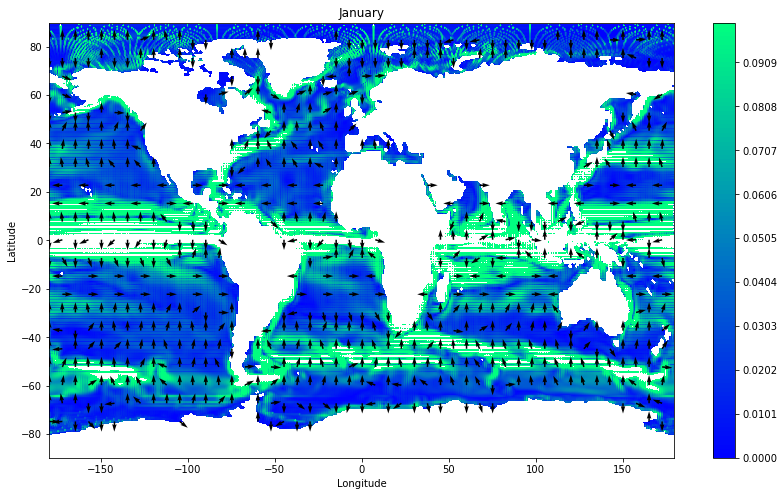

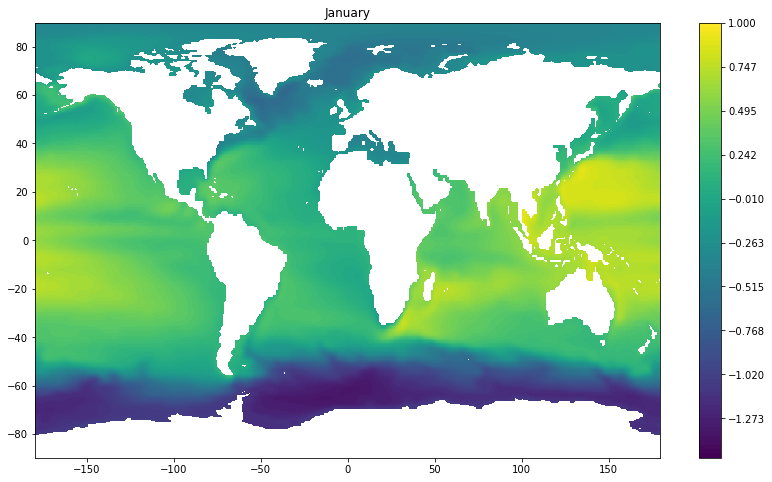

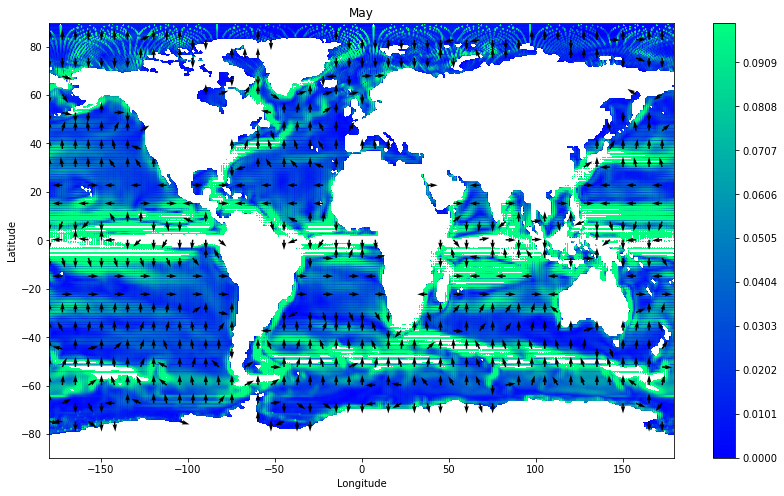

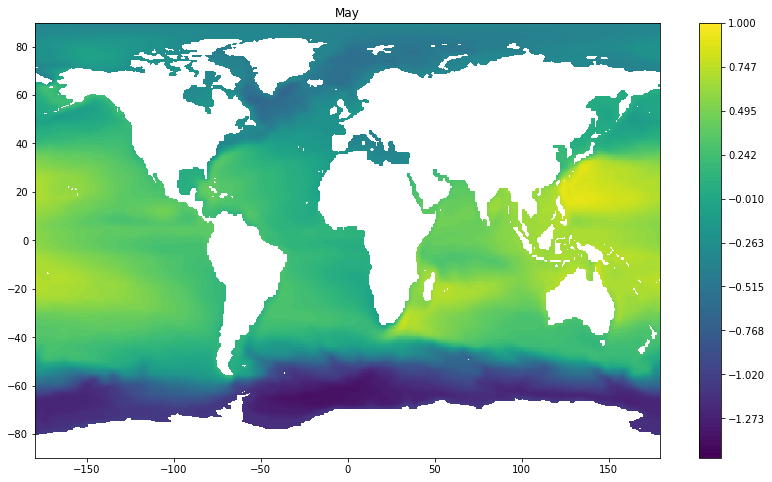

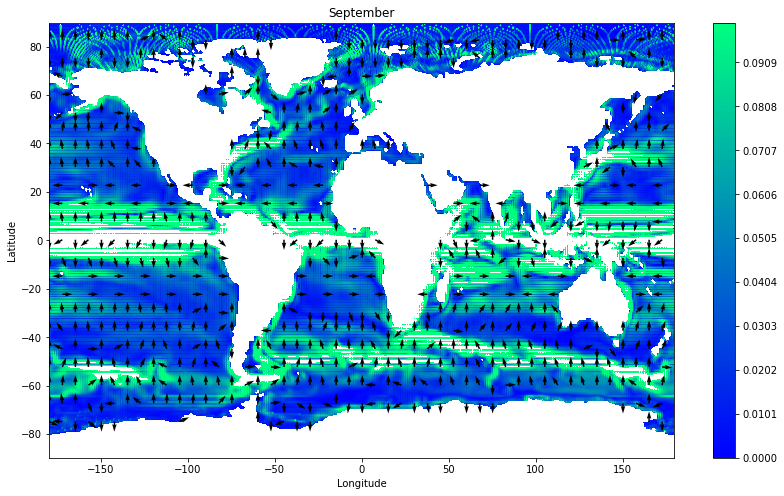

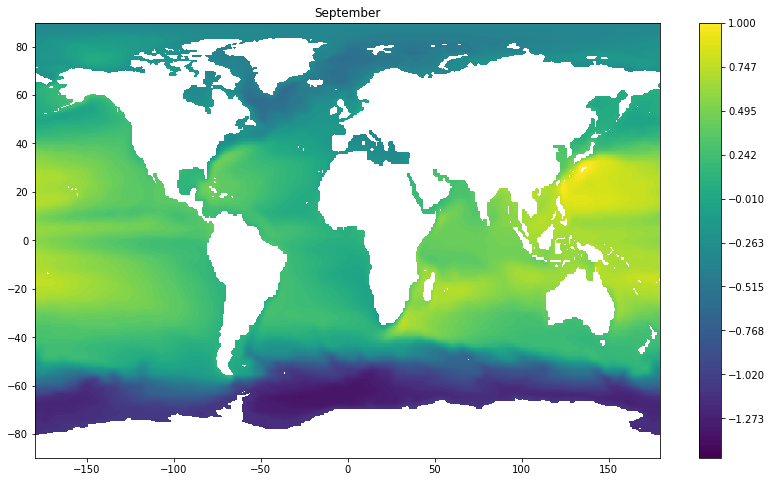

In [74]:
arr=["January", "May", "September"]

for k in range(0,9,4):
 yav_data=yearly_avg_data[k]



 reshaped_arr = yav_data[:,0].reshape(len(yav_data[:,0]),1)
 lon_data_proc = np.concatenate((yav_data, reshaped_arr), axis=1)
 lon_diff_data = np.diff(lon_data_proc, axis=1)

 lat_data_proc = np.concatenate((yav_data, yav_data[0,:].reshape(1,len(yav_data[0,:]))), axis=0)
 lat_diff_data = np.diff(lat_data_proc, axis=0)


 ug = -(g/f.reshape(len(f),1))*(lat_diff_data/dlat)  
 vg = (g/f.reshape(len(f),1))*(lon_diff_data/dlon) 



 for i in range(360):
    for j in range (720):
        if(i==359 or j==719):
            ug[i,j]=math.nan
            vg[i,j]=math.nan

 for i in range(170, 190):
    ug[i,j]=math.nan
    vg[i,j]=math.nan
 mag_arr = np.sqrt(ug**2 + vg**2)
 mag_arr[mag_arr == 0] = 'nan'
 ugNormal = ug/mag_arr
 vgNormal = vg/mag_arr


    

 


 plt.figure(figsize=(14,8))
 level=np.linspace(0,0.1,100)
  


 plt.contourf(lon_mesh, lat_mesh, np.sqrt(ug**2+vg**2),levels=level,cmap=plt.get_cmap('winter')) #,cmap=plt.get_cmap('Greens')
 plt.colorbar()
 


 plt.quiver(lon_mesh[steps], lat_mesh[steps],
                 vgNormal[steps], ugNormal[steps],
                 color='black')
 plt.ylabel('Latitude')
 plt.xlabel('Longitude')
 plt.title(arr[int(k/4)]) 

 plt.show()

 plt.figure(figsize=(14,8))
 level=np.linspace(-1.5, 1, 100);
 plt.contourf(lon_mesh, lat_mesh, yav_data,levels=level);
 plt.title(arr[int(k/4)]) 
 plt.colorbar() 
 plt.show()   

<p>I have plotted 2 Countour plots one for seaSurfaceHeight and another for magnitude of geostropic current</p>
<p>I have used the geostropic current formula (which uses coriolis force balancing the pressure gradient)</p>.
<p>I have chosen 6 graphs (february, april, june, august,october, december) and used 5 year average data for each month</p>.
<p>We know that ocean gyres are asymmetric and shifted towards western boundary this causes strong western boundary current we can see in the plots the north atlantic ocean and pacific ocean we can see a strong western boundary current which is generally observed</p>
<p>We can see a general trend of current being strong near the boundaries </p>
<p>In the plot we can see clockwise gyres in the north atlantic and anti clockwise gyres in the south atlantic</p>
<p>Similarly we can observe gyres in the pacific ocean as well </p>
<p>The geostropic current we are calculating here is not valid near the equator as the sin(phi) reaches zero</p>
<p>We can see a general trend in all months where sea surface height is highest in the mid latitudes and lowest in the poles</p>



(360, 721)


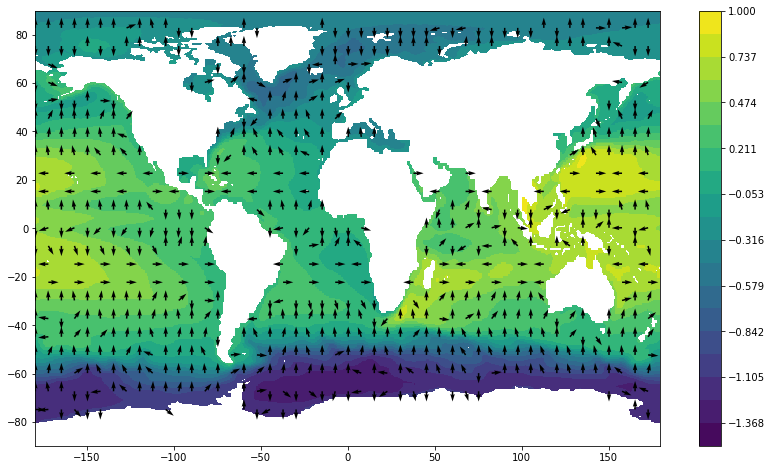

(360, 721)


<Figure size 432x288 with 0 Axes>

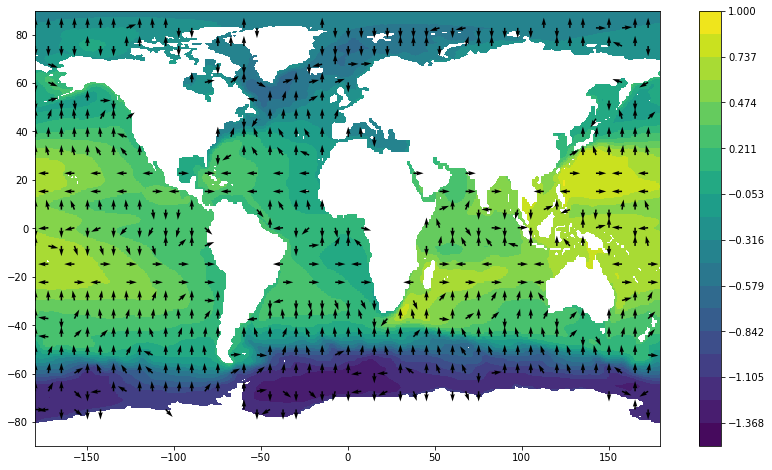

<Figure size 432x288 with 0 Axes>